In [2]:
%%html
<h1 align="center"> <font color="red"> Análise de Dados Epidêmicos - Dengue </h1>
<h2 align="center"> <font color="blue"> Aluno: Marcio Colazingari </h2> <br>
    <p align="center"><img src="dados/dengue_animado.gif"></p>
<br>
<h2 align="center"> <font color="green"> Trabalho de Entrega do Curso Enap BootCamp </h2>
<h2 align="center"> Módulo 2 - Ciência de Dados </h2>
<h2 align="center"> Professor: Professor: Alex Lopes </h2> <br>
<h3 align="center"> <font color="brown"> 2020, Escola Nacional de Administração Pública - Enap </h3> 

In [3]:
%%html
<h3> O objetivo deste trabalho será a Análise de Dados sobre a epidemia de dengue em 2 cidades da América Latina.</h3>
<h3> Tratam-se de dois(02) arquivos no formato CSV contendo dados extraídos do sítio da internet: </h3>
<a href="https://www.drivendata.org/" align="center" target="popup"><h2> <img src="dados/drivendata-logo.svg", width="400"> </h2> </a>
<br>

In [4]:
%%html
<h2><font color="red"> Dos dados: </h3> </font>
<h3> Foram fornecidos dois arquivos CSVs contendo:<br>
    1. informações climáticas e de vegetação ; <br>
    2. registros quantitativos de casos semanais de dengue.</h3>
<h3 align="left"><font color="blue"> Os dados serão analisados <br> com o uso de bibliotecas aprendidas no curso.<br>
<font color="green"> 1. <font color="red"> Pandas e Numpy <font color="green"> para a organização dos dados <br>
2. <font color="green">  <font color="red ">Matplotlib e Seaborn para a <font color="green"> geração de gráficos.


In [5]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%%html
<h2 align="center"> <font color = blue> Carregamento e preparação dos Dados CSVs </h2>

In [7]:
# loading do CSV de features e labels e merge dos dados:
df_features = pd.read_csv("dados/dengue_features_train.csv", na_values=[" ","...","na","NA","nan","Na"])
df_labels = pd.read_csv("dados/dengue_labels_train.csv",na_values=[" ","...","na","NA","nan","Na"])
df_dengue = pd.merge(df_features,df_labels)
df_dengue

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [8]:
%%html
<h2 align="center"> <font color = "red"> Dicionário dos dados - ""algumas colunas"" </font> </h2> 
<font color = "blue"><h3> NDVI (ne,nw,se,sw) - <font color = "gray"> Índice de Vegetação da Diferença Normalizada (-1 planta morta +1 planta saudável ) </h3> 
<font color = "blue"><h3> Preciptation_amt - <font color = "gray"> Preciptação Total </h3>
<font color = "blue"><h3> reanalilysis_air_temp_k - <font color = "gray"> Temperatura do Ar (mean) </h3>
<font color = "blue"><h3> reanalysis_avg_temp_k - <font color = "gray"> Temperatura do ar (avg) </h3>
<font color = "blue"><h3> reanalysis_dew_point_temp_k - <font color = "gray"> Temperatura do ponto de orvalho </h3>
<font color = "blue"><h3> reanalysis_relative_humidity_percent - <font color = "gray"> Umidade Relativa do Ar (mean) </h3>
<font color = "blue"><h3> reanalysis_tdtr_k - <font color = "gray"> Faixa da Temperatura Diurna </h3>
<font color = "blue"><h3> station_diur_temp_rng_c - <font color = "gray"> Faixa de temperatura medidas da estação climática </h3>
<font color = "blue"><h3> total_cases - <font color = "gray"> Casos de Cotaminação Totais </h3>




In [9]:
%%html
<h2 align="center"> <font color = "red"> MOTIVAÇÃO </h2>
<h3><font color="green"> A presença do mosquito Aedes Aegypti na américa latina é motivo de intensa preocupação 
pelas autoridades de saúde. Entre tantas outras maldições, o tal mosquito é transmissor dos tipos virais DENV-x, ocasionador
da doença denominada Dengue. <br><br>
Procedimentos de Ciência de Dados aplicados na área da saúde, em especial estudos de transmissões de doenças, podem 
contribuir com os profissionais deste setor. Tais estudos podem nortear processos de combate à transmissões epidêmicas.
<br><br>
Este estudo promovido em evento de competição (atualmente em andamento) pela entidade Driven Data, tem como objetivo 
promover a análise de dados (estatística) relacionando dados climáticos e regionais com a ocorrência da Dengue em duas cidades 
sj (San Juan) e iq (Iquitos). <br>
No final, uma questão: <br> <br> <font color = "red"> </h3>
   <h2 align="center"> Existe correlação entre as variáveis climáticas e o quantitativo de casos de dengue? </h2> <br><br>

In [10]:
%%html
<h2 align="center"><font color="blue">Vamos iniciar nossa jornada dando uma espiadinha na estatística descritiva 
na base de dados da dengue </h2></font>
<h3> A tabela abaixo irá apresentar para cada variável informações de: <br>
    -- contagem, mean, desvio padrão, e quartis --<br>

In [11]:
df_dengue.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [12]:
%%html
<h2 align="center"><font color="blue">Análise da tabela Describe: </h2>
<h3><font color="green"> Na tabela acima temos informações da estatística descritiva para toda a base de dados.
Por exemplo, para a variável que demonstra a qualidade das plantações na região nordeste (nvdi_ne), 
teremos uma média de 0.142 com um desvio padrão de 0.140.Com um range de valores 
entre -0.40 a um valor máximo de 0.508. O valor médio de 0.140 pode representar uma baixa qualidade 
das áreas verdes para esta região, tendo como base as amostras coletadas. <br> <br>
<font color="orange"> Para a variável ano, por exemplo, que é uma variável categórica, temos a indicação que o primeiro ano de contagem
min, é o ano de 1990 e que no útimo ano,max, será 2010. Assim os dados coletados referem-se a um longo período 
de observação (20 anos). <br><br>
<font color="gray"> Para a variável "station_max_temp_c", que representam as medidas de temperatura mais elevadas nos períodos, os valores 
variam entre 26.7 à 42 graus celsius, compreendendo assim uma região de clima quente, já que o range de temperaturas 
mínimas giram entre 14.7 à 25 graus Celsius. Clima típico das regiões tropicais, característico também pela
elevada proliferação de mosquitos. <br><br>
<font color="red"> A última variável, "total_cases", representa a quantidade de casos totais semanais no período,
registrados por semana. Assim os registros apontam para o valor mínimo de 0 (zero), que significa sem nenhum registro de
ocorrência da doença naquela semana, chegando ao máximo de 461 registros numa dada semana. O que pode levar à tamanha 
variância das ocorrências? Tendo 24 em mean e 43 de desvio padrão.

In [13]:
%%html
<h2 align="center"> Dados numéricos (tabulares) trazem muitas informações (importantes), <br>
porém são de lenta percepção aos nossos olhos. <br> 
Neste caminho, análises gráficas tornam-se 
indispensáveis para a melhor <br>
interpretação dos dados coletados. <br><br><br><br>

In [14]:
%%html
<br><br><br>
<h2 align=center> <font color="blue"> PLOTAGENS E ANÁLISES GRÁFICAS </h2><br>

In [15]:
%%html
<h3> Vamos começar nossa análise comparando o total de registros por cidades </h3>

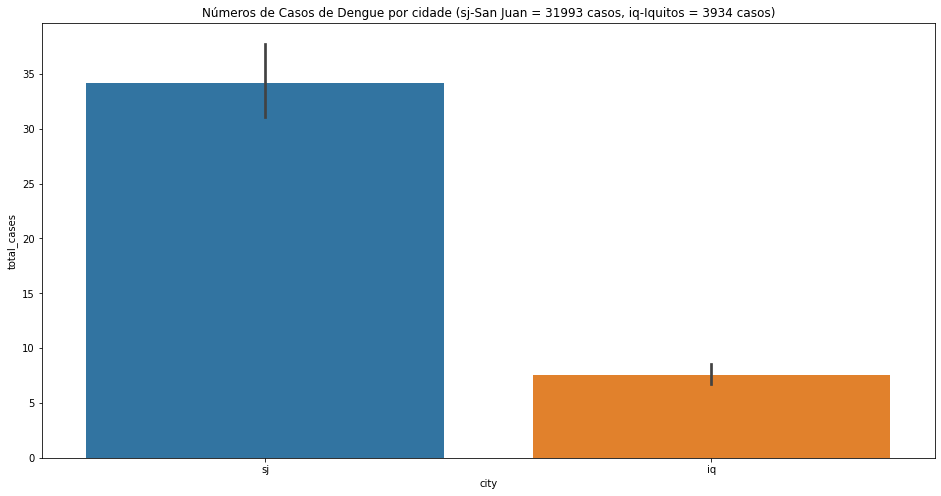

In [16]:
plt.figure(figsize=(16,8))
sum_cases_sj = sum(df_dengue[df_dengue.city == "sj"]["total_cases"])
sum_cases_iq = sum(df_dengue[df_dengue["city"]=="iq"].total_cases)
plt.title(f"Números de Casos de Dengue por cidade (sj-San Juan = {sum_cases_sj} casos, iq-Iquitos = {sum_cases_iq} casos)" )
sns.barplot(data=df_dengue, x="city", y="total_cases")
plt.show()

In [17]:
%%html
<h3 align="center"><font color="blue"> Nas barras acima, temos a representação dos casos de dengue totais medidos
ao longo de 20 anos. Os casos totalizam <font color = "red">31.993 para San Juan e <font color="green">3.934 para Iqitos</h3>

In [18]:
%%html
<h3 align="center"><font color="green"> As duas plotagens seguintes correspondem à dois histogramas <br> da distribuição dos casos de dengue 
ao longo de 20 anos. <br>O primeiro caso está na escala numérica tradicional (decimal), o segundo caso,
representam os mesmos dados convertidos para a escala logaritma</h3>

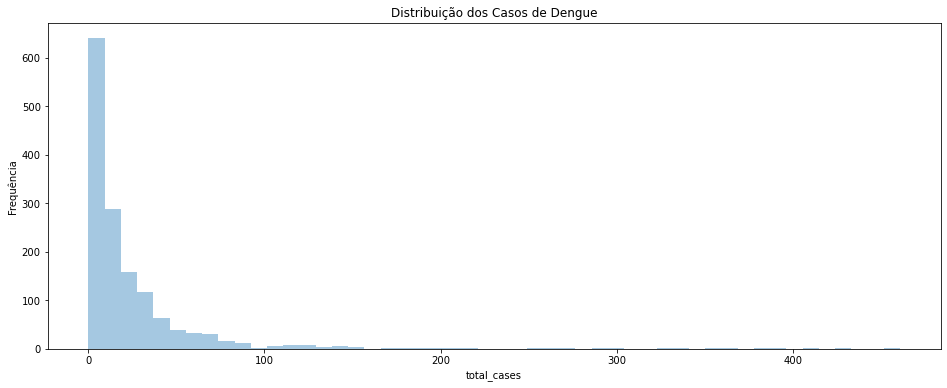

In [19]:
### Histograma de distribuição dos casos totais de dengue (20 anos)
plt.figure(figsize=(16, 6))
plt.title("Distribuição dos Casos de Dengue")
plt.ylabel("Frequência")
sns.distplot(a=df_dengue.total_cases, kde=False)
plt.show()

In [20]:
%%html
<h3 align="center"><font color="blue"> A distribuição das ocorrências acima é Assimétrica do tipo rigth-skew.
Grande parte das ocorrências concentram-se abaixo de 100 casos. <font color="red"> Poderíamos assim dizer que a 
maior parte das semanas tiveram menos que 100 registros "semanais". <font color="blue"> Porém há indicações 
preocupantes, <font color = "green"> medindo 400 ocorrências registradas numa única semana. <font color = "red">
Tratam-se de períodos epidêmicos mais graves? </h3> 

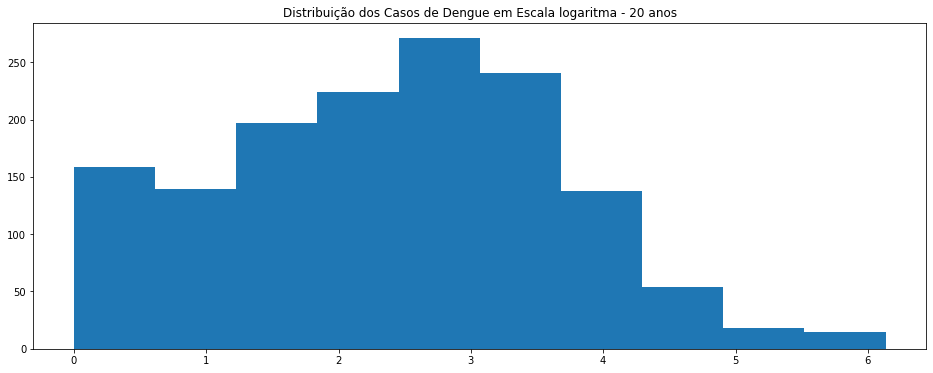

Medição de Skewness. Escala Decimal: 5.273849692657031, Escala Logaritma: -0.083162523439949


In [21]:
### Distribuição dos casos de dengue em escala logaritma 
### Distribuição pode aprimorar a qualidade da regressão numérica

# Não converter os casos iguais à Zero
cases_arr = np.array(df_dengue.total_cases)
cases_log_array = []
for x in cases_arr:
    if x==0:
        cases_log_array.append(x)
    else:
        cases_log_array.append(np.log(x))

# Plotagem do Array Total Cases 
plt.figure(figsize=(16,6))
plt.title("Distribuição dos Casos de Dengue em Escala logaritma - 20 anos")
plt.hist(cases_log_array, bins=10)
plt.show()

#Cálculo de skewness para ambas as escalas
skew_cases_decimal = df_dengue.total_cases.skew()
skew_cases_log = (pd.DataFrame(cases_log_array)[0]).skew()
print(f"Medição de Skewness. Escala Decimal: {skew_cases_decimal}, Escala Logaritma: {skew_cases_log}")

In [22]:
%%html
<h3 align="center"><font color = "green"> No histograma acima, os mesmos dados que representam os casos semanais
ao longo de 20 anos, estão agora reproduzidos em escala logarítma. A maior simetria distributiva destes
dados (skewness= -0.083) poderá resutar em melhor qualidade da regressão numérica? <br>
<font color = "blue"> Esta questão será respondida futuramente, <br> Onde serão realizados
experimentos com Regressão Numérica (Machine Learning) :)) </h3>  

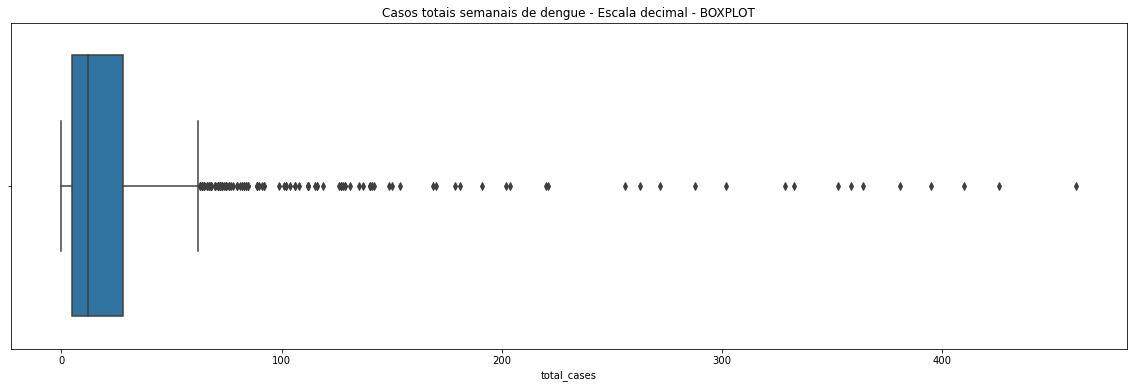

In [23]:
# Boxplot total:
plt.figure(figsize=(20,6))
plt.title("Casos totais semanais de dengue - Escala decimal - BOXPLOT")
sns.boxplot(data=df_dengue, x="total_cases")
plt.show()

In [24]:
%%html
<br><br><br><br>
<h2 align=center> Distribuição de ocorrências de dengue por ano - todas as cidades </h2>

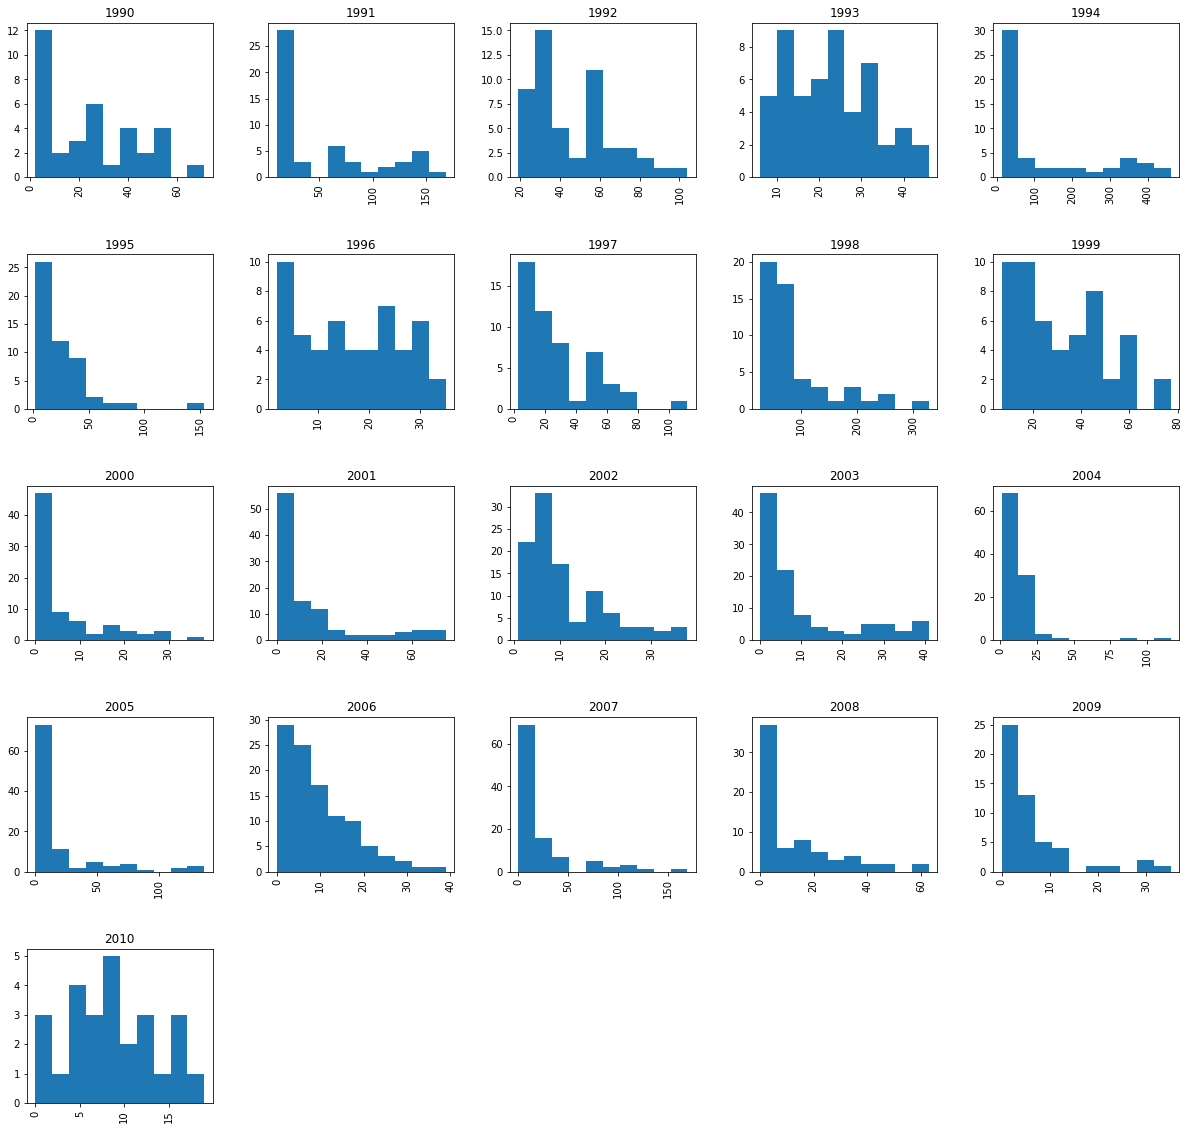

In [25]:
plt.rc('figure', figsize=(20,20))
df_dengue.hist(column="total_cases", by="year")
plt.show()

In [26]:
#### Soma agregada de casos, agrupados por ano:
df_total_cases_year = df_dengue["total_cases"].groupby(df_dengue["year"]).agg(["mean", "sum"])
df_total_cases_year

,mean,sum
year,,
1990,24.742857,866
1991,53.865385,2801
1992,45.596154,2371
1993,22.230769,1156
1994,125.634615,6533
1995,25.634615,1333
1996,16.442308,855
1997,27.961538,1454
1998,88.365385,4595


In [27]:
%%html
<h2 align = "center"> <font color="blue"> <br><br><br> BOX - PLOTS </h2> 

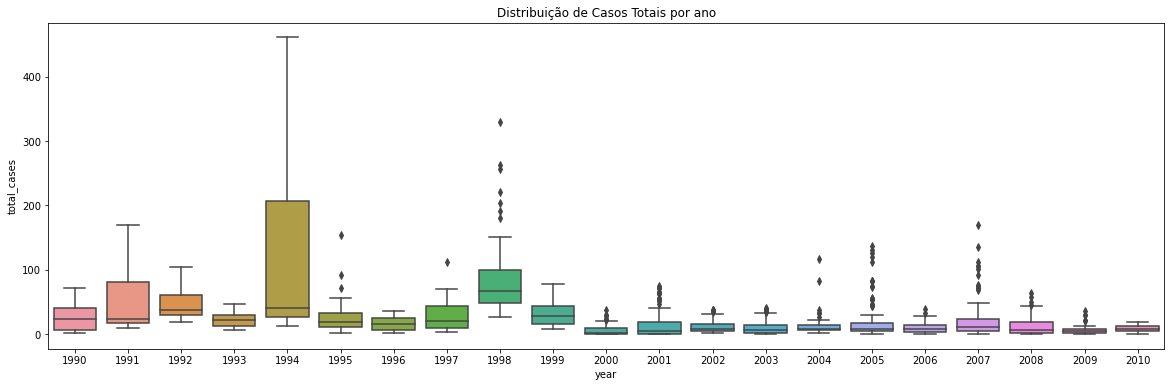

In [28]:
## boxPlots
plt.figure(figsize=(20,6))
plt.title("Distribuição de Casos Totais por ano")
sns.boxplot(data=df_dengue, y="total_cases", x="year")
plt.show()

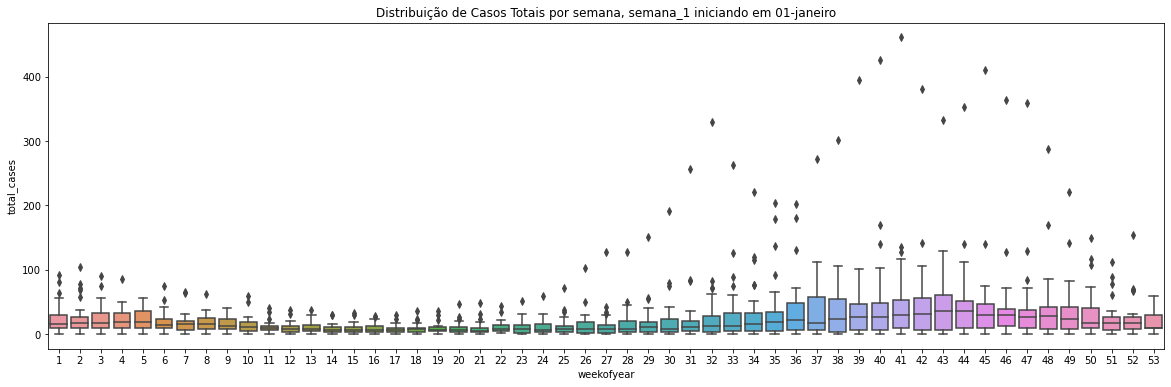

In [29]:
plt.figure(figsize=(20,6))
plt.title("Distribuição de Casos Totais por semana, semana_1 iniciando em 01-janeiro")
sns.boxplot(data=df_dengue, y="total_cases", x="weekofyear")
plt.show()

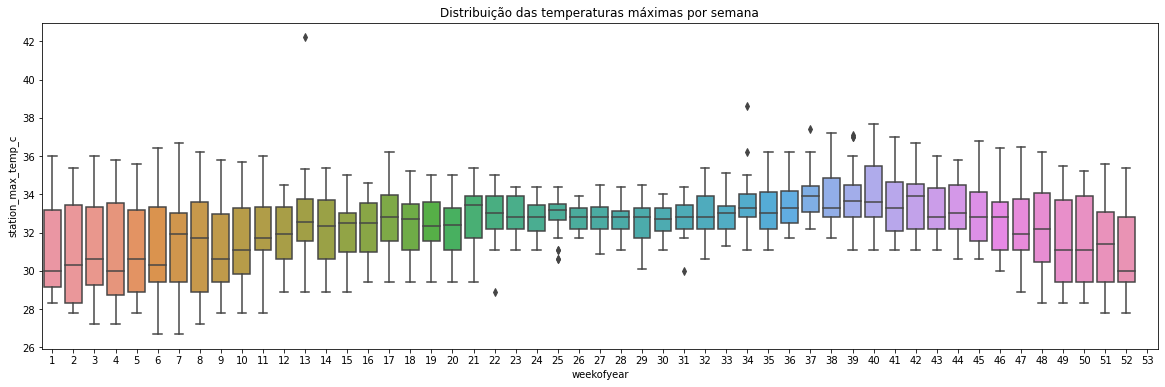

In [30]:
plt.figure(figsize=(20,6))
plt.title("Distribuição das temperaturas máximas por semana")
sns.boxplot(data=df_dengue, y="station_max_temp_c", x="weekofyear")
plt.show()

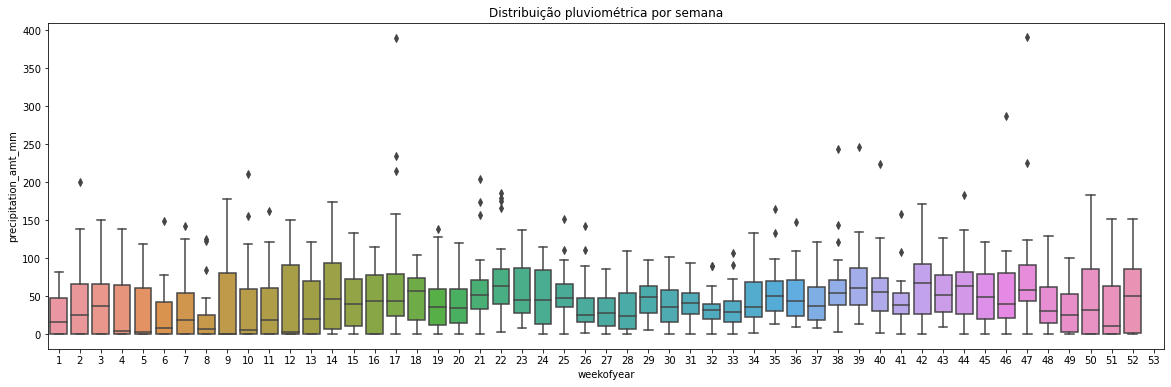

In [31]:
plt.figure(figsize=(20,6))
plt.title("Distribuição pluviométrica por semana")
sns.boxplot(data=df_dengue, y="precipitation_amt_mm", x="weekofyear")
plt.show()

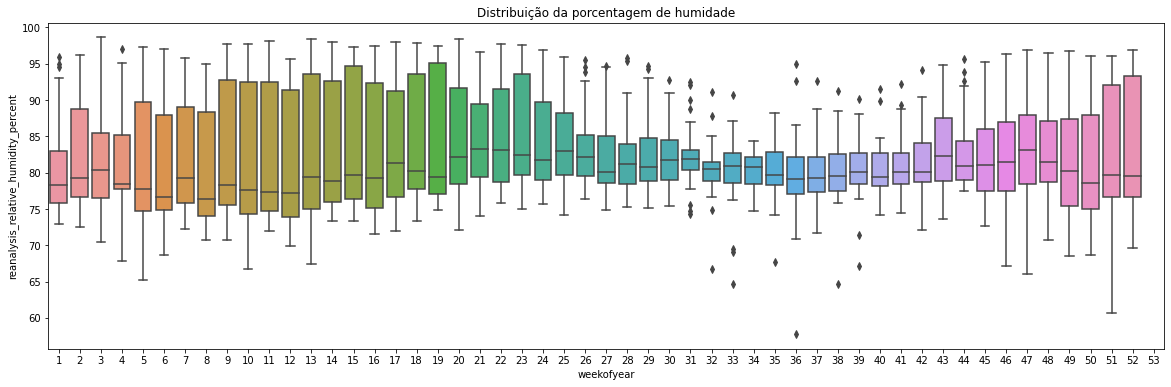

In [32]:
plt.figure(figsize=(20,6))
plt.title("Distribuição da porcentagem de humidade")
sns.boxplot(data=df_dengue, y="reanalysis_relative_humidity_percent", x="weekofyear")
plt.show()

In [33]:
%%html
<h2 align = "center"> <font color="blue"> <br><br><br> Plotagem entre temperatura máxima e Casos Totais </h2> 

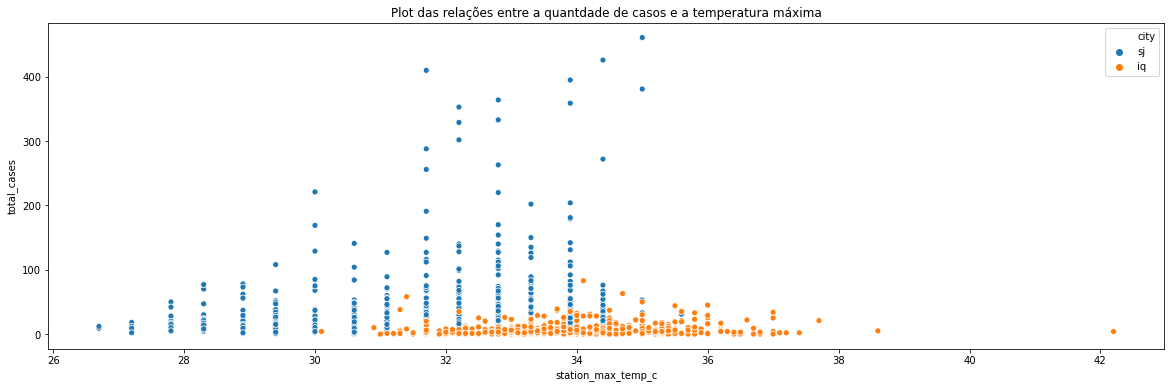

In [34]:
plt.figure(figsize=(20,6))
plt.title("Plot das relações entre a quantdade de casos e a temperatura máxima")
sns.scatterplot(data=df_dengue, y="total_cases", x="station_max_temp_c", hue="city")
plt.show()

In [35]:
%%html
<h2 align = "center">  <br> <br>Pair-plots entre as variáveis independentes e 
o <br>label(Quantidade de Casos de Dengue) <br> nvdi - informações de vegetação </h2>

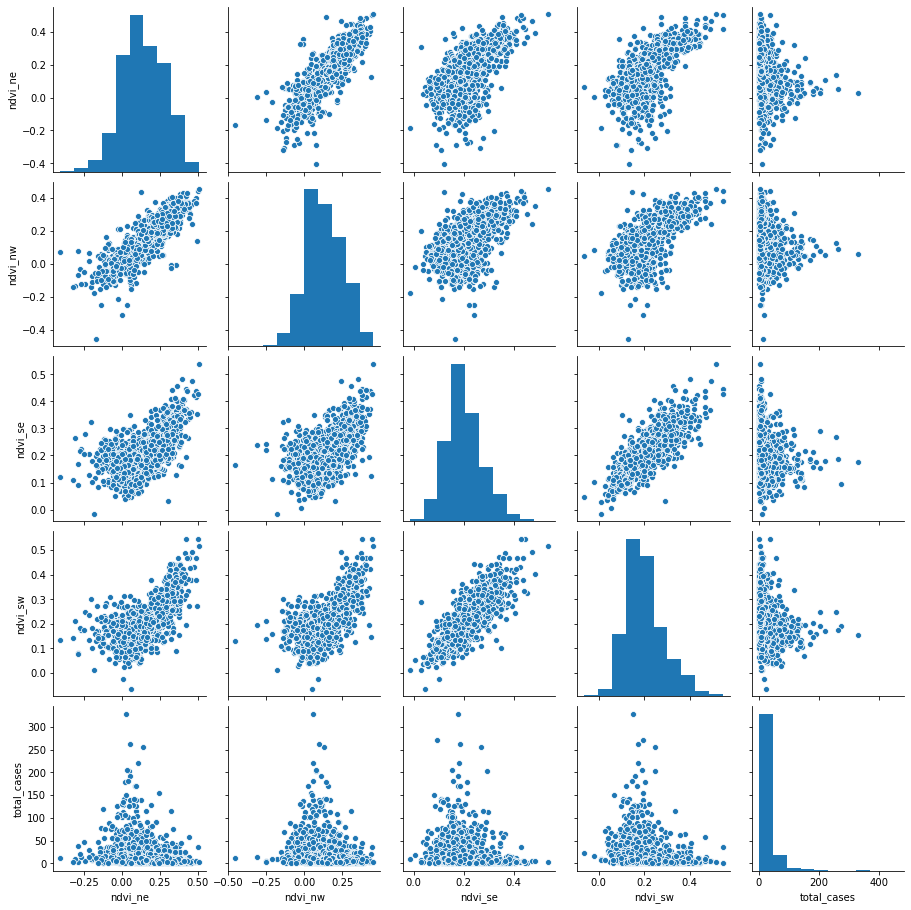

In [36]:
# Pairplot das variáveis ndvi
sns.pairplot(data=df_dengue[['ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'total_cases']])
plt.show()

In [37]:
%%html
<h2 align = "center">  <br> <br>Pair-plots entre as variáveis independentes e 
o <br>label(Quantidade de Casos de Dengue) <br> informações pluviométricas e de umidade </h2>

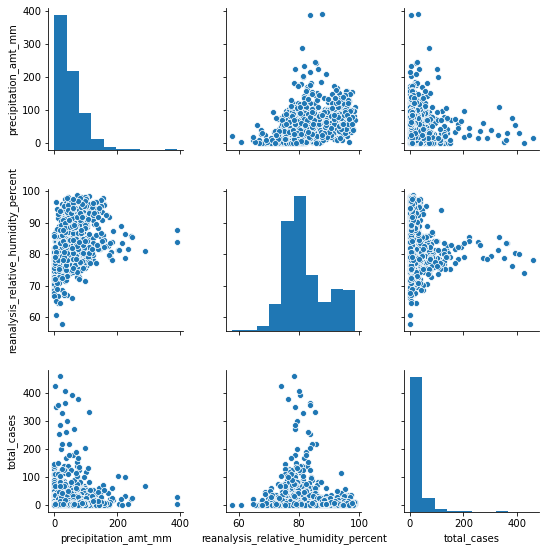

In [38]:
#Pairplot entre precipitação de chuvas, umidade e casos de dengue
sns.pairplot(data=df_dengue[['precipitation_amt_mm','reanalysis_relative_humidity_percent', 'total_cases']])
plt.show()

In [39]:
%%html
<h2 align = "center">  <br> <br>Pair-plots entre as variáveis independentes e 
o <br>label(Quantidade de Casos de Dengue) <br> Informações de temperatura </h2>

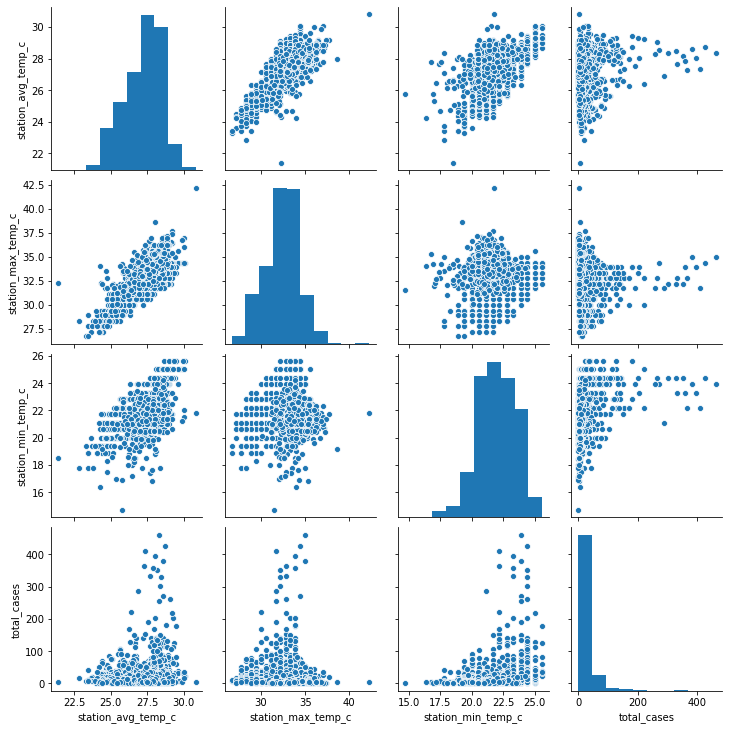

In [40]:
#pairplot entre Temperaturas e Total Cases.
sns.pairplot(data=df_dengue[['station_avg_temp_c', 'station_max_temp_c',
       'station_min_temp_c', 'total_cases']])
plt.show()

In [41]:
%%html
<h2 align = "center"> <font color="blue"> <br> <br> Análise de Correlações </h2>

In [42]:
%%html
<h3 align = "center">   total_cases, como uma variável em sua escala natural - sem transformações </h3>

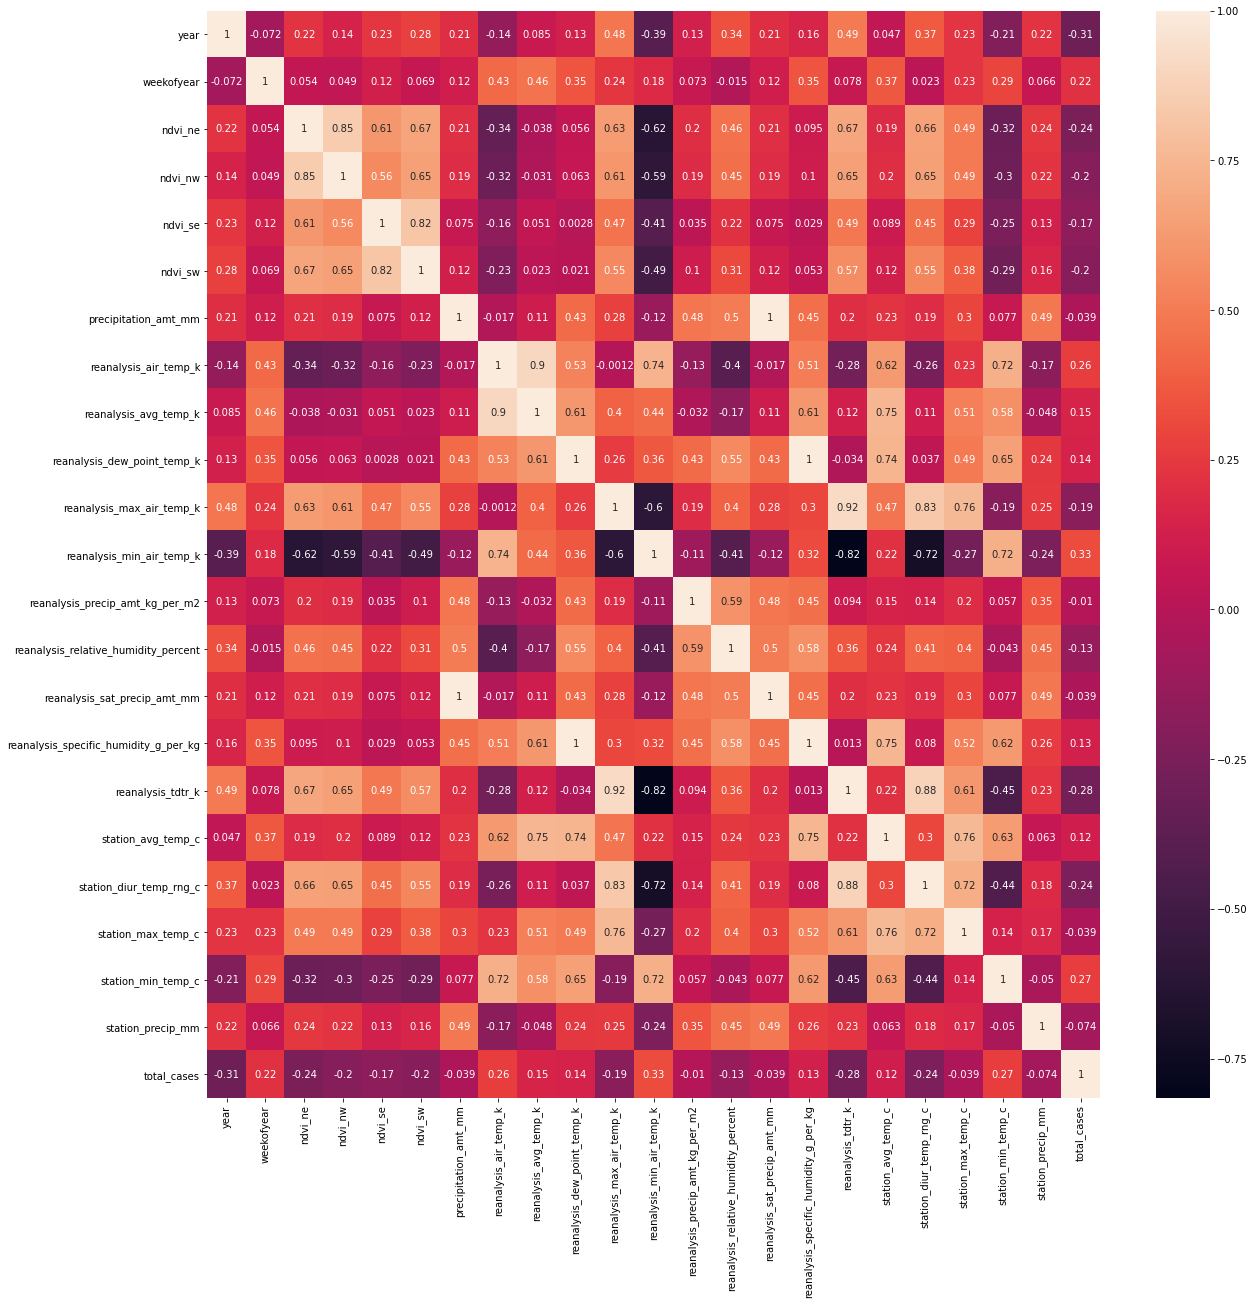

In [43]:
sns.heatmap(df_dengue.corr(), annot=True)
plt.show()

In [44]:
%%html
<h3 align = "center">   total_cases, como uma variável convertida para uma escala Log </h3> 

In [45]:
# Inserindo total_cases_log no data frame original
df_dengue_log = df_dengue
df_dengue_log["total_cases_log"] = cases_log_array
df_dengue_log

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,total_cases_log
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,1.386294
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,1.609438
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,1.386294
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,1.098612
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5,1.609438
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8,2.079442
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1,0.000000
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1,0.000000


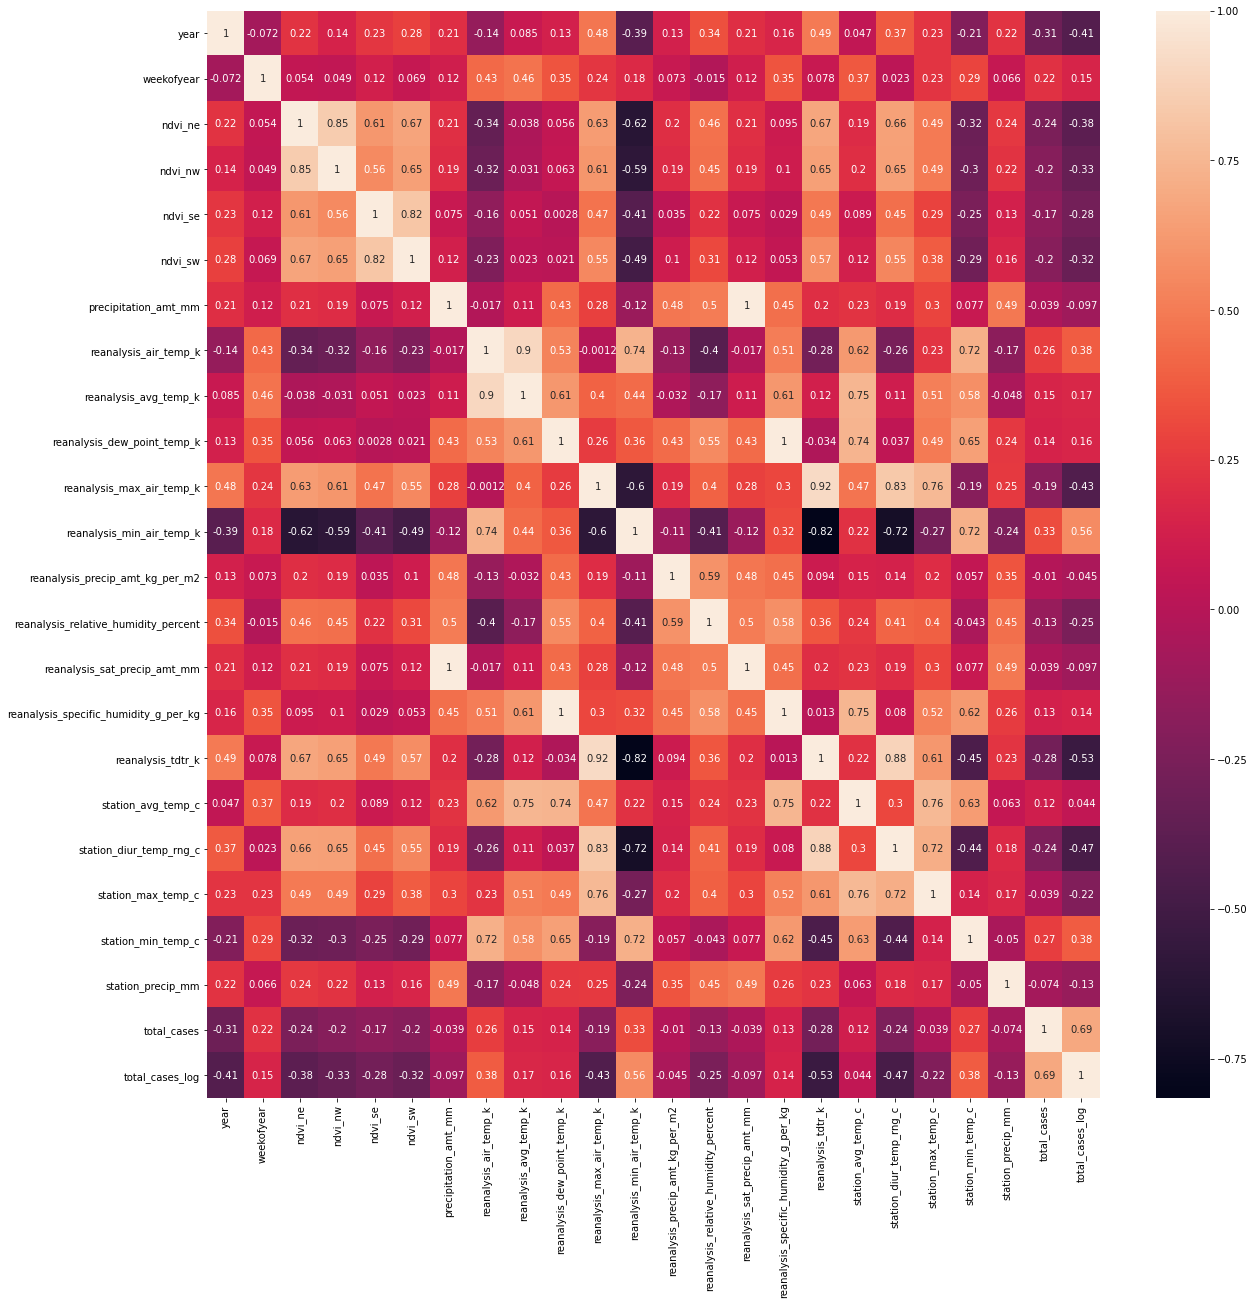

In [46]:
sns.heatmap(df_dengue_log.corr(), annot=True)
plt.show()

In [47]:
%%html
<h2 align = "center"> <font color="red"> <br><br><br> CONCLUSÃO E OUTRAS ANÁLISES </h2>

In [48]:
%%html
<h3 align="center"> 
Em busca de uma resposta ou, ao menos, um maior esclarecimento quanto à questão sugerida na motivação 
deste trabalho: <br><br>
    <font color="blue"> "Existe correlação entre as variáveis climáticas e o quantitativo de casos de dengue ?"<br>
<font color="black">
<br> Foi proposta a análise desta base pública de dados fornecida pela entidade Driven-Data, constituída por um
conjunto de variáveis numéricas (contínuas e discretas) e também categóricas, denominadas (features), e associadas
à um segundo conjunto de dados, denominados labels (ou variável independente,sendo esta numérica e discreta), mapeando
neste contexto informações periódicas, climáticas, qualidade de vegetações e por fim, o label -> a quantidade de casos de 
dengue registrados no período de 1 semana ao longo de 20 anos. <br><br>
Após os procedimentos necessários para os ajustes, unificações, limpezas e transformações na base de dados fornecida pela
entidade Driven-Data, foi criado um Data Frame contendo todas as informações integradas dos dados estudados neste trabalho.
<br><br>
Foi escolhido como ponto de partida das Análises, o estudo da distribuição  da variável "label", nesta situação, 
trata-se da coluna total_cases, ou , o número de casos totais de dengue: <font color="blue">(células 192 à 194)
    <ul align="center"> <font color="green">
    <li> Geração de um histograma contendo as ocorrências dos casos de dengue semanalmente registrados; </li>
    <li> A distribuição é do tipo assimétrica, rigth-skew com os dados concentrados abaixo de 100 ocorrências semanais, o
    índice de skeness calculado foi de 5,373, assim considera-se uma distribuição bem assimétrica, nesta escala de valores ; </li>
    <li> Foi realizado um experimento de conversão destes valores para a escala logaritma, resultando 
    numa distribuição de maior simetria, com coeficiente de skew = -0,083 ;</li>
    <li> <font color="red">Teoricamente, dados com distribuição simétrica tendem à melhor performance preditiva, para as situações de
    regressão numérica, quando da aplicação das técnicas de Machine Learning (proximidade à curva Gaussiana). </li></br>
    </ul>
<font color="black"> 

    O respectivo dataset foi construído com registros de duas cidades, sj(San Juan) e iq(Iqito), coluna "city" , assim na célula
    189 consta uma plotagem em barras, classificado por cidades, com registros de 31.993 casos para San Juan e 
    3.934 casos para Iqito. <br><br>
    
    Outro insigth realizado foi quanto a distribuição das ocorrências de dengue para ambas as cidades ao longo de
    20 anos. Para cada ano foi plotado um histograma específico nas células 198 à 201. Na célula 201 a mesma varredura foi 
    realizada para o gráfico do tipo BoxPlot. Na ocasição , o uso de Box plot combinado com a tabela de totais para
    cada ano trouxe uma melhor visualização da distribuição anual dos casos de Dengue:
        <font color="green">
        <ul>
        <li> Na célula 201 , o box plot facilita a interpretação que a quantidade de casos de dengue registradas nesta
        base de dados foi maior para a década de 90 (1991 à 1999), se comparado aos anos 2000 à 2010. Nossos dados e 
        nosso estudo não é conclusivo no apontamento dos motivadores desta diferença. Não podemos afirmar neste estudo
        se foram razões climáticas, ou uma campanha política de saúde no combate à esta epidemia, ou simplesmente 
        uma alteração na forma dos registros, face às limitações existentes na base de dados providas para este estudo. </li>
        <li> Na década de 90, os maiores registros de caso estão nos anos de 1994 e 1998, totalizando assim 6533 registros
        em 1994 e 4595 casos para o ano de 1998, fato que pode indicar surtos epidemicos nestes dois anos, ou , simplesmente 
        um lançamento de registros mais eficiente do que os demais anos ? </li>
        <li> Já nos anos 2000, em diante, o registro do maior número de casos ocorreu no ano de 2007, com 2.334 casos. </li>        
        </ul>
    <font color="black">
    Na célula 202, foram plotados box_plots do quantitativo de casos de dengue registrados para cada semana. 
    A semana número 1 corresponde à primeira semana de de cada ano, iniciando em 01/janeiro. Já a semana 52, por exemplo,
    representará o período que inicia em 24 de dezembro. <br>
    Nesta célula, as plotagens apontam para um maior número de registros no segundo semestre de um ano. A distribuição
    poderia ser considerada temporal ? Por um motivo os registros apontam para maiores incidências de dengue após as semanas 
    de número 25, até o final de um ano, semana 53.
    Nas células seguintes, foram plotados boxes semanais com dados de temperatura, índice pluviométrico e porcentagem
    de umidade, células 31 à 32, apontando que:
        <font color="green">
        <ul>
        <li> Nas células 220 e 221 há leve aumento das variáveis: "temperatura máxima" e "nível pluviométrico" quando 
            comparados com os níveis do primeiro semestre , porém não se pode afirmar que há causalidade direta com os
            quantitativos medidos quanto aos números de casos de dengue.</li> <br>
        <font color="black">
        Nas células 207 à 211 foram plotadas "Pairs-Plots" que demonstram a distribuição da ocorrências de casos de dengue
        com as demais variáveis, sendo divididos em três grandes grupos (nvdi - qualidade de vegetação da região),
        (índices pluviométricos e porcentagem de umidade) e as informações de temperatura.Na última linha de cada 
        uma das três imagens constam a relação do label total_cases com cada uma das variáveis independentes (features).
        Por exemplo, no Pair-Plot entre os casos totais e as variáveis pluviométrica e de umidade, observem na última 
        linha da plotagem gerada pela célula 209 que a maior parte dos casos estão para índices pluviométricos 
        medidos entre 0 e 200mm e para a porcentagem de umidade entre os índices de 60 à 100%, com valores de
        maior concentração em torno dos 80% de umidade. Tais informações podem consideravelmente auxiliar os 
        processos de predição dos valores de ocorrências de casos de dengue. <br><br>
        
        Finalmente na análise da correlação linear de pearson entre as variáveis independentes e o label (total_cases)
        na célula 211 a tabela de correlação indica um baixo grau de correlação linear existente com a variável label(total_cases)
        , porém na coluna seguinte (total_cases_log)que é a transformada para a escala logarítima dos casos totais, esta
        correlação linear é levemente modificada (maior grau de correlação entre algumas variáveis), <font color="red"> podendo
        assim indicar uma possível melhoria no processo de regressão numérica deste label ? <font color="black">, questão 
        que será respondida na segunda parte deste curso, quando da realização dos testes de Machine Learning. 
        <font color="green">
        Numa interpretação subjetiva (opinião pessoal), acredito que a baixa correlação linear numérica existente entre 
        os features e labels deste dataset resultarão em dificultosa tentativa de realização de Regressão Númérica
        adotando técnicas lineares mais simples ou mesmo até métodos com equações polinomiais. Acredito que os melhores resultados
        de regressão numérica para esta situação serão alcançados com algoritmos de ML mais complexos , como árvores de decisão, 
        random forests, Boosting, ou métodos XgbD (que adotam ténicas de gradiente para a redução do erro ou mse),
        entre outras técnicas mais avançadas. 
        </h3>